In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**In this project, I have examined the effects of factors such as age, physical activity, sleep duration,medication usage, calories burned,daily steps and gender on sleep quality.**

**Loading Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [7]:
df=pd.read_csv("Health_Sleep_Statistics.csv")
df

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


**Getting Information of Data**

In [8]:
df.shape

(100, 12)

There are 100 - Rows and 12 Columns

In [9]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


**Data Cleaning**
 - Check if any duplicate or null values present in data 

In [11]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


1. In Age column mean is 36, which means most of the people in data frame are adults.

2. min age in data is 22 and max age is 50 that means no kid is taken into consideration.

3. 25% people with age 28, 50% with 35 age, 75% with 44 age. that means sinior citizens with the age from 45 to 50 are not taken into consideration.

   similarly we can see the average, min and max data of other features to get the meaningfull insights.

In [14]:
df.drop(['User ID'], axis=1, inplace=True)

#dropping user ID column as it's not helpfull to draw any insights
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


**Sleep Quality Analysis in different age of people**

In [15]:
#calculate the correlation coefficient between Age and sleep Quality
corr_age_sleep_quality= df[['Age','Sleep Quality']].corr()
corr_age_sleep_quality

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


Table shows that Age is inversly proportional to sleep Quality, which means sleep Quality is poor in elder individuals.

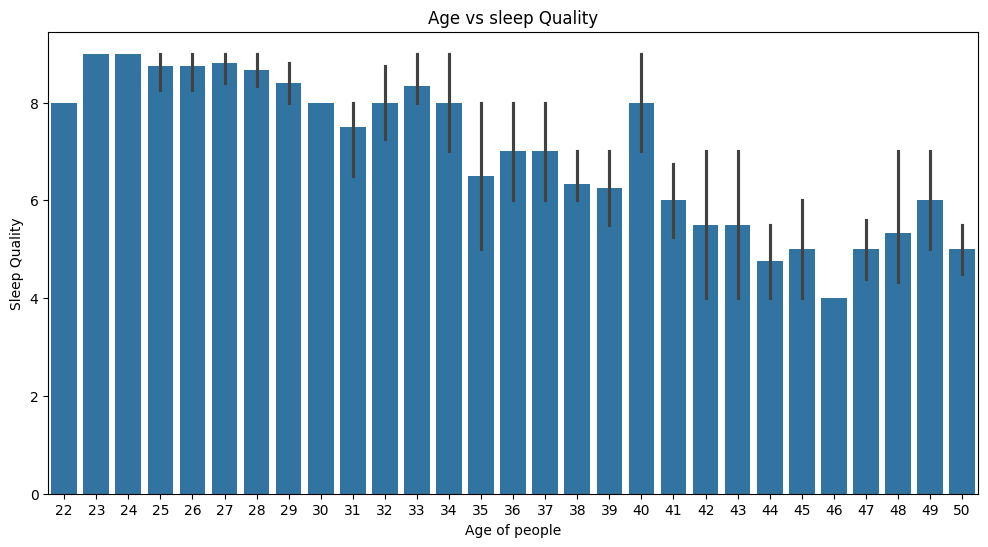

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='Sleep Quality',data = df)
plt.title("Age vs sleep Quality")
plt.xlabel("Age of people")
plt.ylabel("Sleep Quality")
plt.show()

plot shows sleep quality decreasing with increasing age,it give linear relationship. let's try to visualize linear relationship using linear regression model

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x= df[['Age']]
y=df['Sleep Quality']
model.fit(x,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
model.intercept_

np.float64(13.268812023190648)

In [19]:
model.coef_

array([-0.17408531])

In [20]:
model_prediction = model.predict(x)

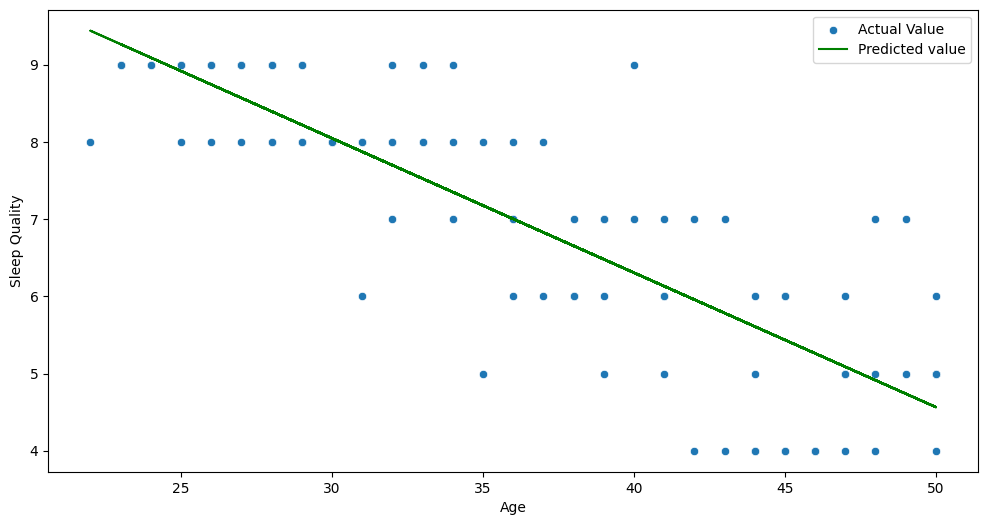

In [21]:
plt.figure(figsize =(12,6))
sns.scatterplot(x='Age',y='Sleep Quality',data = df,label = 'Actual Value')
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.plot(x,model_prediction, label = 'Predicted value',color='Green')
plt.legend()
plt.show()

**Physical Activity in Male and Female and it's effect on Sleep Quality**

Sleep quality between Male and Female

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

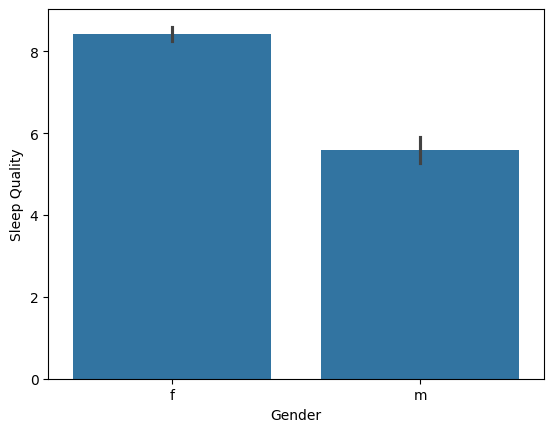

In [22]:
sns.barplot(x='Gender',y='Sleep Quality',data=df)

Graph shows Sleep Quality is good in Females than Males

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

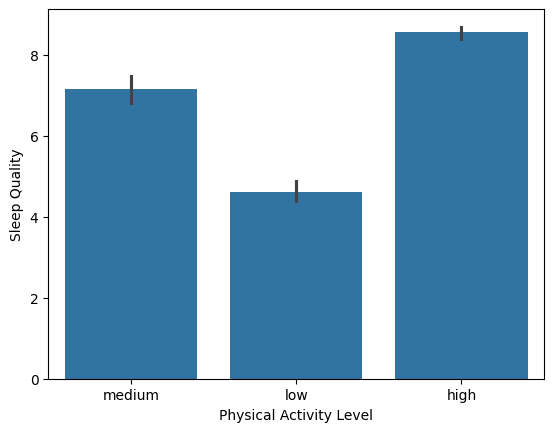

In [23]:
sns.barplot(x='Physical Activity Level',y='Sleep Quality', data=df)

People with High physical activity have good sleep quality as per data

Compare Physical Activity in Genders 

<Axes: xlabel='Gender', ylabel='Physical Activity Level numeric values'>

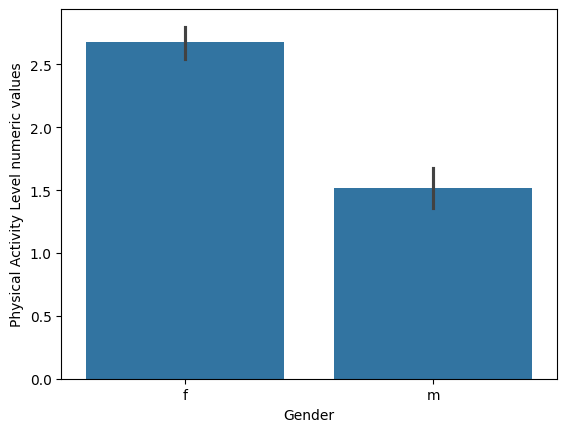

In [24]:
#Gender and Physical Activity Level are label, convert this labels into numbers 
Conv_to_no = {'low':1,'medium':2,'high':3}
df['Physical Activity Level numeric values']=df['Physical Activity Level'].map(Conv_to_no)

#plot graph to identify the relation between two parameters
sns.barplot(x='Gender',y='Physical Activity Level numeric values' ,data=df)

As shown above femals are doing More physical activity than males hence sleep quality is better in females as compared to males.but this plots are not significant to claim the result as it's a sample data. to increase the significance we will calculate the T statistic value and P value. 

In [25]:
from scipy import stats

#sleep quallity in males and females 
sleep_quality_males = df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females = df[df['Gender']=='f']['Sleep Quality']


**Find T and P value by using Gender vs sleep quality data and gender vs physical activity data**

In [26]:
#Sleep quality in males and females
t_value_sleep_quality, p_value_sleep_quality = stats.ttest_ind(sleep_quality_males,sleep_quality_females)
#show t value and P value
print(f"t_value of Sleep quality  vs gender:{t_value_sleep_quality:.2f}")
print(f"p_value of Sleep quality vs gender:{p_value_sleep_quality:.2f}")

#Physical Activity in males and females
physical_activity_males = df[df['Gender']=='m']['Physical Activity Level numeric values']
physical_activity_females = df[df['Gender']=='f']['Physical Activity Level numeric values']

t_value_physical_activity,p_value_physical_activity = stats.ttest_ind(physical_activity_males,physical_activity_females)
#show t value and P value
print(f"t_value of physical activity vs gender: {t_value_physical_activity:.2f}")
print(f"p_value of physical activity vs gender: {p_value_physical_activity:.2f}")

t_value of Sleep quality  vs gender:-14.32
p_value of Sleep quality vs gender:0.00
t_value of physical activity vs gender: -10.98
p_value of physical activity vs gender: 0.00


conclusion : As per the statistics High T value and low P value indicates females do more physical activity hence they have better sleep quality than males. 

**Effects of Bedtime and wake up time on Sleep Quality**

In [27]:
print(type('Bedtime'))
print(type('Wake-up Time'))
df.head()


<class 'str'>
<class 'str'>


,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Physical Activity Level numeric values
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no,2
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes,1
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no,3
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no,1
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no,3


In [28]:
def sleep_duration_hours_helper_function(str_time):
    h = int(str_time.split(':')[0])
    m = int(str_time.split(':')[1])
    return h + m/60
    
df['Bedtime'] = df['Bedtime'].apply(sleep_duration_hours_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_duration_hours_helper_function)

df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Physical Activity Level numeric values
0,25,f,8,23.00,6.50,8000,2500,medium,healthy,no,no,2
1,34,m,7,0.50,7.00,5000,2200,low,unhealthy,yes,yes,1
2,29,f,9,22.75,6.75,9000,2700,high,healthy,no,no,3
3,41,m,5,1.00,6.50,4000,2100,low,unhealthy,yes,no,1
4,22,f,8,23.50,7.00,10000,2800,high,medium,no,no,3


In [29]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Physical Activity Level numeric values,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,medium,healthy,no,no,2,7.5
1,34,m,7,0.50,7.00,5000,2200,low,unhealthy,yes,yes,1,6.5
2,29,f,9,22.75,6.75,9000,2700,high,healthy,no,no,3,8.0
3,41,m,5,1.00,6.50,4000,2100,low,unhealthy,yes,no,1,5.5
4,22,f,8,23.50,7.00,10000,2800,high,medium,no,no,3,7.5


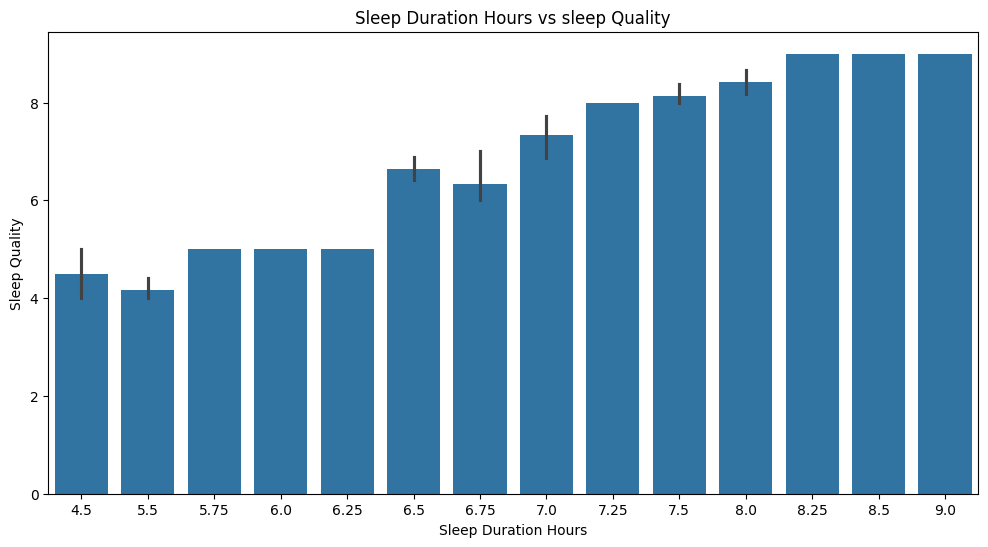

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x='Sleep Duration Hours',y='Sleep Quality', data =df)
plt.title("Sleep Duration Hours vs sleep Quality")
plt.xlabel("Sleep Duration Hours")
plt.ylabel("Sleep Quality")
plt.show()

Checking Linear relationship between sleep duration hour and sleep quality

In [31]:
X=df[['Sleep Duration Hours']]
Y=df['Sleep Quality']

model_S=LinearRegression()
model_S.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


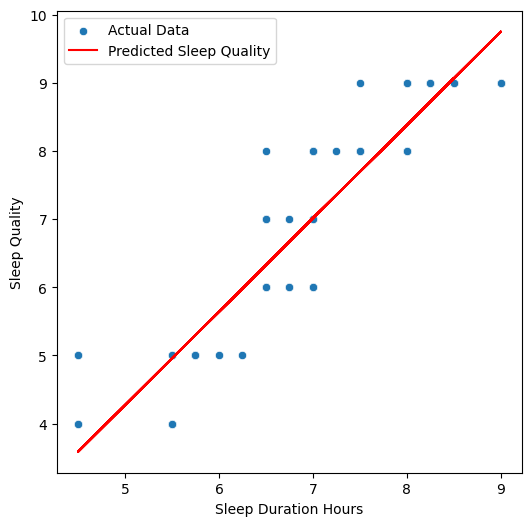

In [32]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model_S.predict(X), color = 'red', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()

**Amount of calories burned effects on sleep quality**

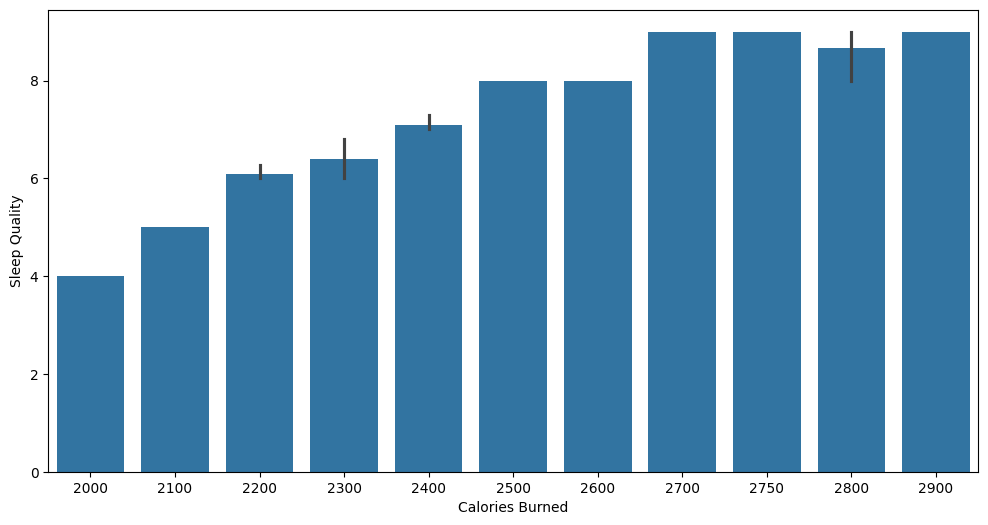

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x='Calories Burned',y='Sleep Quality',data = df)
plt.show()

In [34]:
model_c= LinearRegression()
X = df[['Calories Burned']]
Y = df['Sleep Quality']
model_c.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


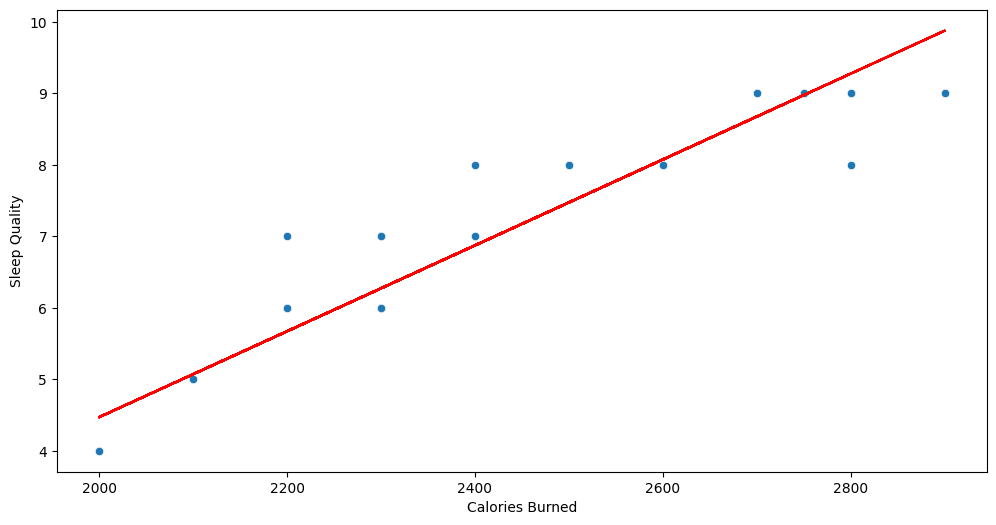

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Calories Burned',y='Sleep Quality',data=df)
plt.plot(X,model_c.predict(X),color='red')
plt.show()

**Effects of Daily steps on sleep quality**

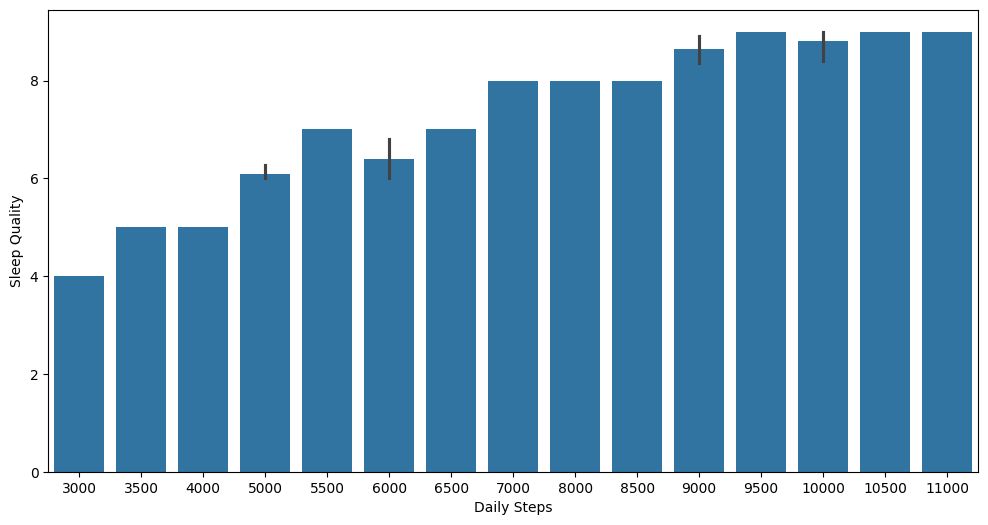

In [36]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Daily Steps', y = 'Sleep Quality', data = df)
plt.show()

In [37]:
model_Steps= LinearRegression()
X = df[['Daily Steps']]
Y = df['Sleep Quality']
model_Steps.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


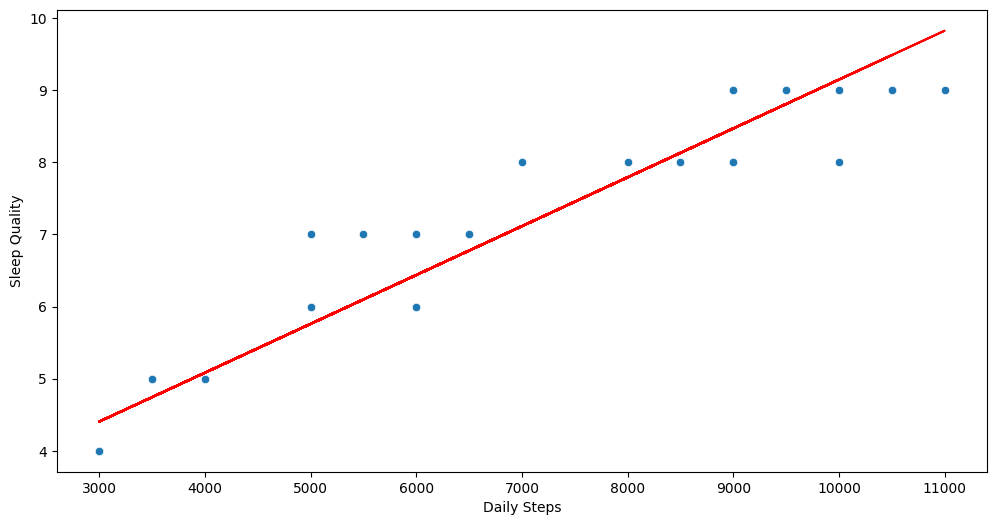

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Daily Steps',y='Sleep Quality',data=df)
plt.plot(X,model_Steps.predict(X),color='red')
plt.show()

**Check if taking Medication has any effect on sleep quality**

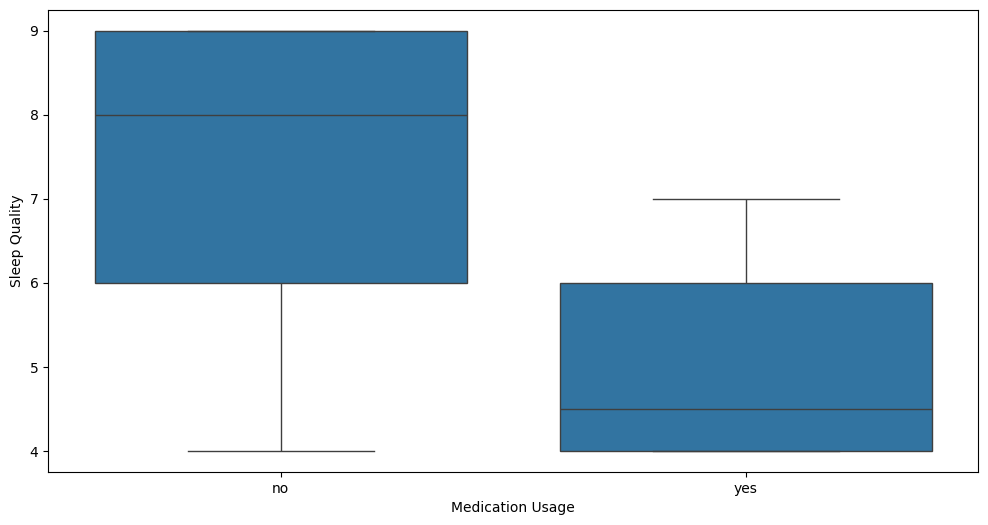

In [39]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Medication Usage', y = 'Sleep Quality', data = df)
plt.show()

In [40]:
medication_quality = df[df['Medication Usage'] == 'yes']['Sleep Quality']
no_medication_quality = df[df['Medication Usage'] == 'no']['Sleep Quality']

t_statistic, p_value = stats.ttest_ind(medication_quality, no_medication_quality, equal_var=False)
print(f't-test Statistic for Sleep Quality: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -8.08
p-value: 0.0000


**Impact of Dietary Habbits on Sleep Quality**

In [41]:
summary = df.groupby('Dietary Habits')['Sleep Quality'].describe()
print(summary)
#average sleep quality based on dietary habbit

                count      mean       std  min  25%  50%  75%  max
Dietary Habits                                                    
healthy          29.0  8.862069  0.350931  8.0  9.0  9.0  9.0  9.0
medium           30.0  7.700000  0.466092  7.0  7.0  8.0  8.0  8.0
unhealthy        41.0  5.170732  0.946109  4.0  4.0  5.0  6.0  7.0


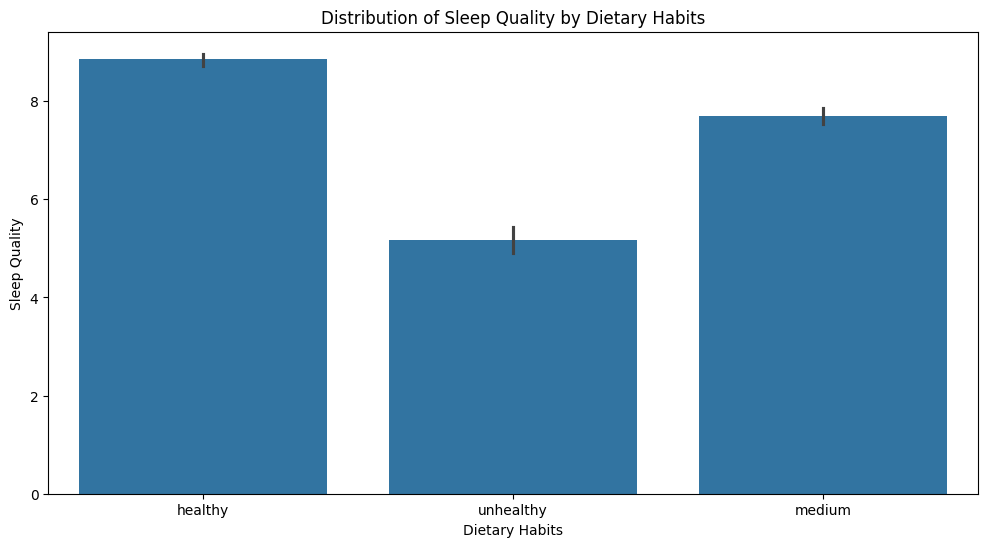

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Dietary Habits', y='Sleep Quality', data=df)
plt.title("Distribution of Sleep Quality by Dietary Habits")
plt.xlabel("Dietary Habits")
plt.ylabel("Sleep Quality")
plt.show()

**What Factors mostly affect Sleep Quality ?**

In [43]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality                             1.000000
Daily Steps                               0.976277
Calories Burned                           0.973557
Sleep Duration Hours                      0.918909
Physical Activity Level numeric values    0.875203
Bedtime                                   0.853312
Wake-up Time                             -0.048526
Age                                      -0.848356
Name: Sleep Quality, dtype: float64


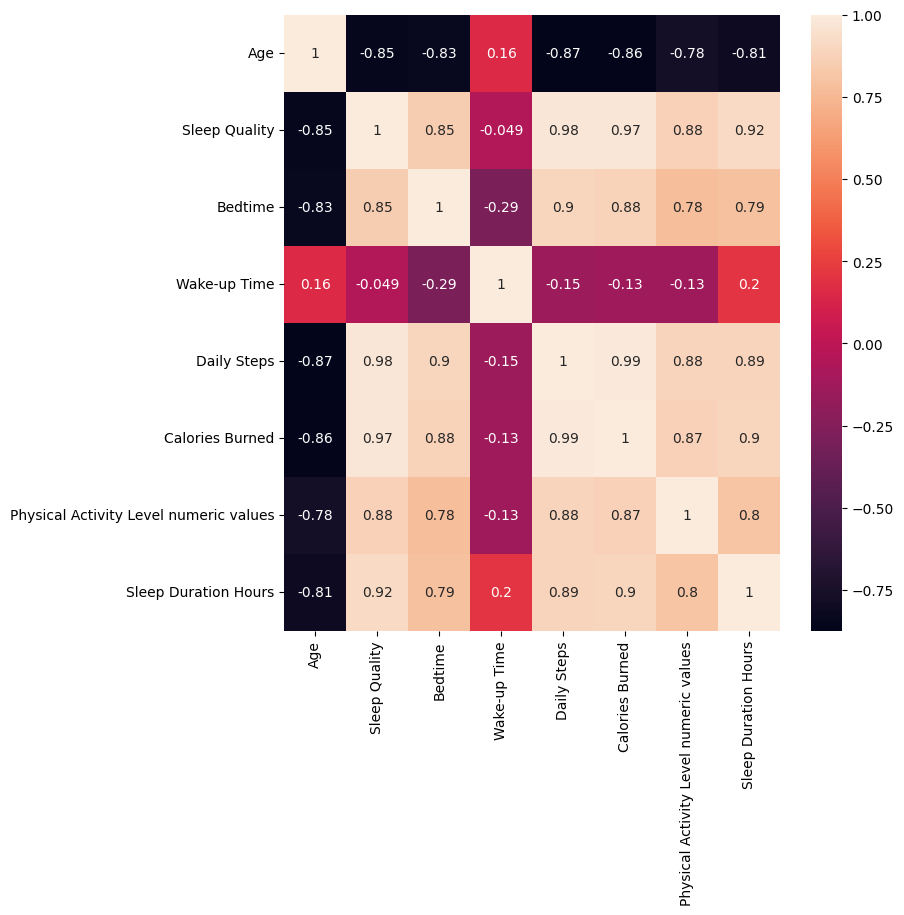

In [44]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()


 
**Summary of Insights:**

1. Sleep quality tends to decrease with increasing age, indicating poorer sleep patterns among older individuals.

2. Females showed better sleep quality compared to males, possibly due to higher levels of physical activity.

3. Sleep duration is directly proportional to sleep quality — longer sleep durations are associated with better sleep outcomes.

4. Additional factors such as calories burned, daily steps, medication usage, and presence of sleep disorders were found to have a significant impact on overall sleep quality.